In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize
from konlpy.tag import Kkma,Twitter
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
import csv
from tqdm import tqdm

In [64]:
d = pd.read_excel('test.xlsx',sheet_name='sheet1')

In [65]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26344 entries, 0 to 26343
Data columns (total 13 columns):
연월      26344 non-null int64
전시제목    26344 non-null object
링크      26344 non-null object
전시작가    26344 non-null object
전시일정    26344 non-null object
초대일시    18971 non-null object
관람시간    26342 non-null object
전시장소    26342 non-null object
주소      26326 non-null object
연락처     26342 non-null object
홈페이지    21614 non-null object
아티클     26326 non-null object
텍스트     25621 non-null object
dtypes: int64(1), object(12)
memory usage: 2.8+ MB


In [66]:
d.dropna(subset=['텍스트'],inplace=True) #텍스트 없는 로우 드랍

In [67]:
sum(d.duplicated(subset=['텍스트'])) # 중복된 텍스트 수 

5101

In [68]:
toDropIndex = d[d.duplicated(subset=['텍스트'])].index

In [69]:
d.drop(index = toDropIndex, inplace=True)

In [70]:
toDropIndex = d[d.duplicated(subset=['전시제목','전시일정'])].index #그래도 같은 전시는 drop

In [71]:
d.drop(index = toDropIndex, inplace=True)

In [72]:
d.info() # 20514 개 데이터

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20514 entries, 0 to 26343
Data columns (total 13 columns):
연월      20514 non-null int64
전시제목    20514 non-null object
링크      20514 non-null object
전시작가    20514 non-null object
전시일정    20514 non-null object
초대일시    16757 non-null object
관람시간    20514 non-null object
전시장소    20514 non-null object
주소      20514 non-null object
연락처     20514 non-null object
홈페이지    17162 non-null object
아티클     20514 non-null object
텍스트     20514 non-null object
dtypes: int64(1), object(12)
memory usage: 2.2+ MB


In [78]:
d20514 = d.reset_index(drop=True)

In [80]:
d20514.to_excel('d20514.xlsx')

In [81]:
with open('d20514.csv', 'w',newline='', encoding='cp949') as fp: # 인코딩문제
    wr = csv.writer(fp)
    for i in range(d20514.shape[0]):
        wr.writerow(d20514.iloc[i,:])

UnicodeEncodeError: 'cp949' codec can't encode character '\u8d5e' in position 14: illegal multibyte sequence

In [28]:
# kkma = Kkma()
twitter = Twitter()

In [18]:
twitter.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [ ]:
tokens = []
for txt in d.텍스트:
    if txt==None:
        continue
    tokens.append(twitter.morphs(txt)) #morphs 를 가져오자

In [ ]:
nouns = []
for i,txt in enumerate(d.텍스트):
    try:
        nouns.append(twitter.nouns(txt)) #nouns 만 가져오자
    except Exception as e:
        continue

In [37]:
ads = []
for txt in d.텍스트:
    ads.append([tag[0] for tag in twitter.pos(txt) if tag[1] in ['Adjective','Adverb','Verb','Exclamation']])

In [86]:
ad_nouns = []
for txt in tqdm(d.텍스트):
    ad_nouns.append([tag[0] for tag in twitter.pos(txt) if tag[1] in ['Noun','Adjective','Adverb','Verb','Exclamation']])

100%|████████████████████████████████████████████████████████████████████████████| 20514/20514 [09:41<00:00, 35.30it/s]


In [38]:
len(ads)#doc 갯수

20514

#### 모든 tokens

In [ ]:
# with open('artTokens.dat','wb') as file: #pickle로 저장
#     pickle.dump(tokens,file)

In [12]:
with open('artTokens.dat','rb') as file: # load
    tokens = pickle.load(file)

In [13]:
plt.rcParams['font.family'] = 'NanumSquare' #그래프 위한 폰트설정

In [22]:
tokens_all = []
for doc in tokens:
    tokens_all += doc

In [23]:
len(tokens_all) #14804510개  tokens

14804510

In [26]:
toeken_all_count = Counter(tokens_all)

In [32]:
sorted_toeken_all_count = sorted(toeken_all_count.items(), key = lambda kv:kv[1],reverse=True) # 출현빈도수로 정렬해보자

In [44]:
sorted_toeken_all_count[:20]

[('의', 567303),
 ('.', 489810),
 ('을', 471366),
 (',', 302310),
 ('이', 276362),
 ('다', 271196),
 ('에', 244084),
 ('은', 210884),
 ('를', 208916),
 ('적', 189768),
 ('는', 187019),
 ('들', 178562),
 ('한', 152090),
 ('과', 146762),
 ('으로', 134934),
 ('것', 134905),
 ('가', 132499),
 ('에서', 116223),
 ('그', 112851),
 ('이다', 96341)]

#### nouns

In [ ]:
# with open('artNouns.dat','wb') as file: #pickle로 저장
#     pickle.dump(nouns,file)

In [17]:
with open('artNouns.dat','rb') as file: # load
    nouns = pickle.load(file)

#### ads

In [39]:
# with open('artAds.dat','wb') as file: #pickle로 저장
#     pickle.dump(ads,file)

In [40]:
with open('artAds.dat','rb') as file: # load
    ads = pickle.load(file)

#### ad_nouns

In [87]:
# with open('artAd_nouns.dat','wb') as file: #pickle로 저장
#     pickle.dump(ad_nouns,file)

In [88]:
with open('artAd_nouns.dat','rb') as file: # load
    ad_nouns = pickle.load(file)

작가별로 doc만들어보자

In [2]:
#저장된 artists 딕셔너리가져온다. 키밸류로 작가,텍스트
with open('artists.dic','rb') as file:
    artists = pickle.load(file)

In [3]:
#전시 횟수로 정렬한 sorted_artists
sorted_artists = sorted(artists.items() ,key = lambda kv: len(kv[1]), reverse=True)

In [4]:
# 전시 횟수만 뽑아보자
exh_len = list(map(lambda el:len(el[1]), sorted_artists)) 
exh_len = np.array(exh_len)

In [5]:
#전시 횟수 기초 통계
print('mean:',exh_len.mean(),
          'std:', exh_len.std(),
     )

mean: 1.8931784259147202 std: 2.3308666774362408


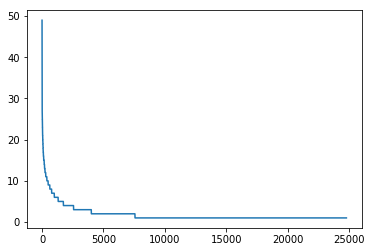

In [6]:
plt.plot(range(len(exh_len)), exh_len) # 횟수1인 작가가 압도적으로 많다

In [7]:
prolifics = sorted_artists[:20]

In [8]:
y = list(map(lambda el:len(el[1]), prolifics)) # 다작 아티스트의 전시 수 
y[0:10]

[49, 44, 39, 36, 35, 34, 31, 31, 29, 29]

In [9]:
x = list(map(lambda el:el[0], prolifics))
x[0:10]

['이이남', '백남준', '김환기', '서용선', '이우환', '김종학', '김민정', '김지은', '이지연', '변대용']

In [17]:
plt.rcParams['font.family'] = 'NanumSquare' #그래프 위한 폰트설정

<Container object of 20 artists>

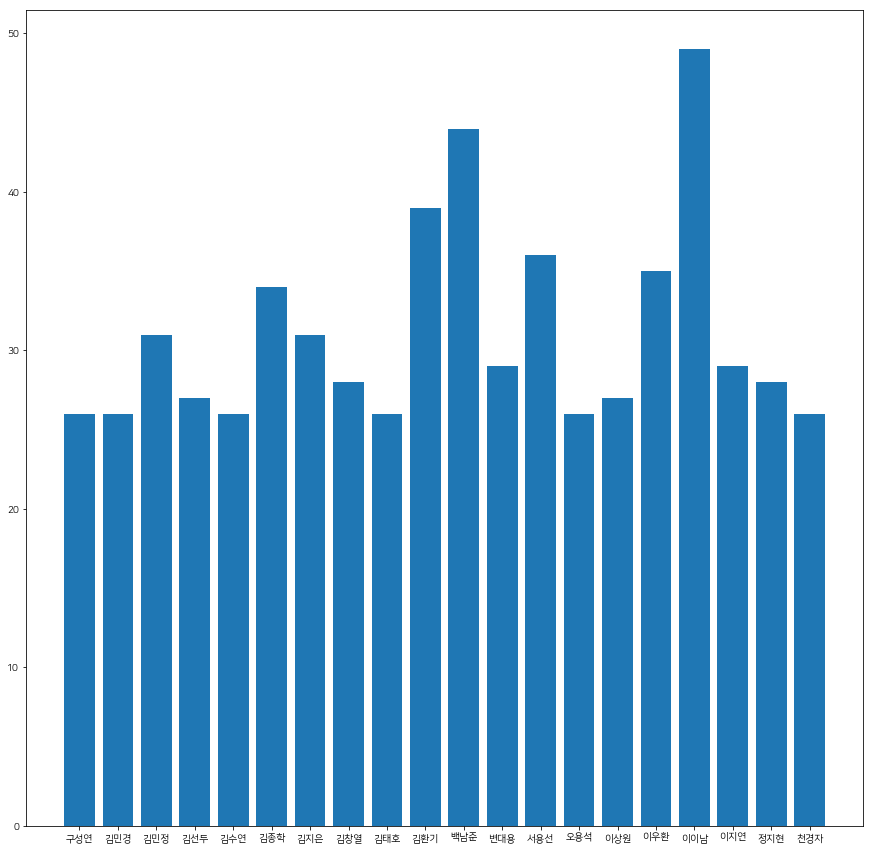

In [18]:
plt.figure(figsize = (15,15))
plt.bar(x,y)

In [17]:
sorted_artists_twice = [artist for artist in sorted_artists if len(artist[1])>1]

In [20]:
len(sorted_artists_twice) # 두번 이상 전시했던 7565명의 작가

7565

In [19]:
sorted_artists_twice[-1]

('양재문(Yang Jaemoon)',
 ['지난 육십 평생을 \n        돌이켜 보면 삼십 년은 보통사람으로 삼십 년은 사진가라는 이름으로 살아 오면서 내 안에 살아 숨쉬는 있는 욕구를 위해 셔터를 \n        수 없이 눌러왔지만 대부분의 많은 이미지들이 휴지통으로 혹은 나만의 은밀한 방에 잠시 걸렸다가 세상의 빛을 보지 못하고 사라져 \n        갔다. 오랜 시간 사진과 같이 해오면서 근래 들어 부쩍 사진에 대해서 생각하는 시간이 많아졌다. 과연 사진의 본질은 무엇인가. \n        결국은 사진 그 자체 보다는 어떻게 쓰이는가가 더 우선이라는 데 무게가 더해졌다. 무엇이든 다시 시작하는 것은 언제나 그리 늦지도 \n        빠르지도 아니하다. 눈으로 볼 수 없는 시간을 자로 재듯이 살아갈 필요도 없고 타인과 비교할 필요도 없는 것이기 때문이다. 덜하다고 \n        낙망할 필요도, 넘친다고 자만할 필요도 없는 것이 무념으로 가는 지름길일 것이라 나는 믿는다. 이 번 전시는 내 가슴에 고이 \n        간직해오던 아름답고 소중한 성적 감성과 더불어 어쩌면 부끄러울 수도 있는 본능적 욕구를 은밀하게 드러내는 작업이다. 어쩌면 나는 \n        체면이라는 가면 때문에 전시장에 작품을 설치하기 직전에 바꾸는 비굴함을 선보일지도 모른다. 그래도 나는 묵묵히 가고자 한다. \n        설령 길이 보이지 않아도 나는 갈 것이다. 지금까지 사진을 찍어 오면서 진솔하게 느낀 것이 하나 있다면 그 것은 바로 셔터를 \n        누르지 않으면 사진이 찍히지 않는다는 것이다. 아무리 힘든 여정이라도 걸어 가다 보면 사막의 신기루처럼 언제나 사진은 그렇게 \n        나에게 다가와 주었다. 나의 인생에 함께해준 참으로 고마운 사진에게, 그리고 그 동안 내 사진 안으로 들어와준 이 세상 모든 \n        것에 대하여 고마운 마음으로 남은 사진 여생을 다시 시작하려 한다. ⓒ',
  '삼성스마트 카메라 \n       

In [22]:
with open('sorted_artists_twice.lst','wb') as file:
    pickle.dump(sorted_artists_twice,file)

In [23]:
with open('sorted_artists_twice.lst','rb') as file:
    sorted_artists_twice = pickle.load(file)

In [24]:
sorted_artists_corpus= list(map(lambda el:(el[0], '\n'.join(el[1])), sorted_artists_twice))

In [26]:
sorted_artists_corpus[-1]

('양재문(Yang Jaemoon)',
 '지난 육십 평생을 \n        돌이켜 보면 삼십 년은 보통사람으로 삼십 년은 사진가라는 이름으로 살아 오면서 내 안에 살아 숨쉬는 있는 욕구를 위해 셔터를 \n        수 없이 눌러왔지만 대부분의 많은 이미지들이 휴지통으로 혹은 나만의 은밀한 방에 잠시 걸렸다가 세상의 빛을 보지 못하고 사라져 \n        갔다. 오랜 시간 사진과 같이 해오면서 근래 들어 부쩍 사진에 대해서 생각하는 시간이 많아졌다. 과연 사진의 본질은 무엇인가. \n        결국은 사진 그 자체 보다는 어떻게 쓰이는가가 더 우선이라는 데 무게가 더해졌다. 무엇이든 다시 시작하는 것은 언제나 그리 늦지도 \n        빠르지도 아니하다. 눈으로 볼 수 없는 시간을 자로 재듯이 살아갈 필요도 없고 타인과 비교할 필요도 없는 것이기 때문이다. 덜하다고 \n        낙망할 필요도, 넘친다고 자만할 필요도 없는 것이 무념으로 가는 지름길일 것이라 나는 믿는다. 이 번 전시는 내 가슴에 고이 \n        간직해오던 아름답고 소중한 성적 감성과 더불어 어쩌면 부끄러울 수도 있는 본능적 욕구를 은밀하게 드러내는 작업이다. 어쩌면 나는 \n        체면이라는 가면 때문에 전시장에 작품을 설치하기 직전에 바꾸는 비굴함을 선보일지도 모른다. 그래도 나는 묵묵히 가고자 한다. \n        설령 길이 보이지 않아도 나는 갈 것이다. 지금까지 사진을 찍어 오면서 진솔하게 느낀 것이 하나 있다면 그 것은 바로 셔터를 \n        누르지 않으면 사진이 찍히지 않는다는 것이다. 아무리 힘든 여정이라도 걸어 가다 보면 사막의 신기루처럼 언제나 사진은 그렇게 \n        나에게 다가와 주었다. 나의 인생에 함께해준 참으로 고마운 사진에게, 그리고 그 동안 내 사진 안으로 들어와준 이 세상 모든 \n        것에 대하여 고마운 마음으로 남은 사진 여생을 다시 시작하려 한다. ⓒ\n삼성스마트 카메라 \n        NX 씨

corpus에서 tokens를 뽑아내자

In [29]:
artists_twice_tokens = []
for artist in tqdm(sorted_artists_corpus):
    tokens = twitter.morphs(artist[1])
    artists_twice_tokens.append((artist[0],tokens))

100%|██████████████████████████████████████████████████████████████████████████████| 7565/7565 [16:41<00:00,  7.56it/s]


In [30]:
artists_twice_tokens[-1]

('양재문(Yang Jaemoon)',
 ['지난',
  '육십',
  '평생',
  '을',
  '돌이',
  '켜',
  '보면',
  '삼십',
  '년',
  '은',
  '보통사람',
  '으로',
  '삼십',
  '년',
  '은',
  '사진가',
  '라는',
  '이름',
  '으로',
  '살',
  '아',
  '오면',
  '서',
  '내',
  '안',
  '에',
  '살',
  '아',
  '숨',
  '쉬는',
  '있는',
  '욕구',
  '를',
  '위해',
  '셔터',
  '를',
  '수',
  '없이',
  '눌러',
  '왔',
  '지만',
  '대부분',
  '의',
  '많은',
  '이미지',
  '들',
  '이',
  '휴지통',
  '으로',
  '혹은',
  '나',
  '만의',
  '은밀',
  '한',
  '방',
  '에',
  '잠시',
  '걸렸',
  '다가',
  '세상',
  '의',
  '빛',
  '을',
  '보지',
  '못',
  '하고',
  '사라져',
  '갔',
  '다',
  '.',
  '오랜',
  '시간',
  '사진',
  '과',
  '같이',
  '해오면',
  '서',
  '근래',
  '들어',
  '부쩍',
  '사진',
  '에',
  '대해서',
  '생각하는',
  '시간',
  '이',
  '많아졌',
  '다',
  '.',
  '과연',
  '사진',
  '의',
  '본질',
  '은',
  '무엇',
  '인가',
  '.',
  '결국',
  '은',
  '사진',
  '그',
  '자체',
  '보다는',
  '어떻',
  '게',
  '쓰이는',
  '가',
  '가',
  '더',
  '우선',
  '이라는',
  '데',
  '무게',
  '가',
  '더해',
  '졌',
  '다',
  '.',
  '무엇',
  '이든',
  '다시',
  '시작하는',
  '것',
  '은',
  '언제나',
  '그리',
  '늦지',

In [31]:
with open('artists_twice_tokens.lst','wb') as file:
    pickle.dump(artists_twice_tokens,file)